<h1 align=center><font size = 6>Recomendaciones basadas en contenido: películas en IMDb</font></h1>

Vídeos en YouTube, películas y series en Netflix, canciones en Spotify, productos en Amazon... En la mayoría de los servicios que utilizamos a día de hoy existen sistemas de recomendaciones, algunos más intrusivos tomando decisiones en la reproducción, como por ejemplo YouTube o Spotify, y otros a nivel de sugerencia como Netflix o Amazon.

El propósito de estos sistemas siempre es el mismo, ofrecer al usuario lo que se considera más adecuado para él, tratando de conseguir así el mayor agrado e impacto positivo posible. El usuario estará más satisfecho cuanto mayor sea el acierto.

En este cuaderno vamos a crear un básico sistema de recomendación basada en contenido, empleando un listado de películas y puntuaciones de la web <a href='https://www.imdb.com/'>IMDb</a>. Por tiempo y recursos no es nuestro propósito crear un modelo que compita con los de las plataformas anteriormente citadas, pero sí describir una posible solución y comprobar lo fácil que resulta implementarla en código.

# 1. Metodología

## 1.1. Punto de partida

Como indicábamos anteriormente, para la creación de este sistema de recomendaciones emplearemos un conjunto de datos de la web IMDb, obtenido a través de <a href='https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset'>Kaggle</a>. El fichero contiene todas las películas catalogadas en la web, incluyendo el siguiente detalle que será de ayuda para nuestro propósito:
<ul>
    <li>original_title: nombre de la película en su lengua original, no siempre coincidiendo con como la conocemos en nuestro país.</li>
    <li>year: año de estreno.</li>
    <li>genre: géneros a los que pertenece. Puede hacerlo con uno o varios.</li>
    <li>avg_vote: puntuación media con la que los usuarios han valorado la película, en un rango hasta 10 puntos.</li>
    <li>votes: número de personas que han valorado la película. A mayor número de votos, más popular.</li>
</ul>

No disponemos de las valoraciones que han realizado otros usuarios, solamente la nota media resultante de todas ellas. Por este motivo se han descartado otros sistemas de recomendación como el colaborativo, en el que las sugerencias estarían basadas en otros usuarios que han realizado nuestras mismas valoraciones o muy próximas.

## 1.2. Criterio a seguir

Nuestra hipotética plataforma de contenido dispondrá de la totalidad de películas registradas en IMDb (algo que no existe en la práctica). En función de los gustos del usuario, obtenidos a partir de las valoraciones que realiza sobre cada película que ha visto, el sistema recomendará 20 películas que cumplirán lo siguiente:
<ul>
    <li>Número mínimo de votos de 20.000. Con este filtro trataremos de centrarnos solamente en las películas más populares, evitando que aquellas que tienen muy pocas valoraciones pero con puntuaciones elevadas puedan figurar por encima de otras evaluadas por más personas.</li>
    <li>Puntuación mínima de 7 puntos. Dado que el propósito es satisfacer los gustos del usuario, evitaremos recomendar contenido que haya obtenido puntuaciones mediocres.</li>
    </ul>
    
Dado que el número de valoraciones que un usuario puede tener en sus primeros pasos en la plataforma será muy reducido, el sistema de recomendaciones se dividirá en 3 grupos:
<ul>
    <li>Usuarios con 3 o menos valoraciones: el sistema propondrá un listado de las 20 películas más populares, entendiendo como tales las 7 películas estrenadas entre 2019 y la actualidad y que más valoraciones han obteniedo, las 5 más populares entre 2010 y 2019, 3 correspondientes entre 2005 y 2010, y 5 desde 1990 a 2005.</li>
    <li>Usuarios entre 4 y 20 valoraciones: se sugerirá una propuesta de 20 películas formada por tantas sugerencias personalizadas como películas ya haya valorado, complementado las restantes hasta 20 con el listado de las más populares empleado en el supuesto anterior.</li>
    <li>Usuario con 20 valoraciones o más: se recomendarán 20 títulos en función de los gustos del usuario.</li>
    </ul>
    
Más adelante simularemos un usuario de cada tipo para comprobar el comportamiento.

## 1.3. Sistema de recomendación basado en contenido

### 1.3.1. Descripción

Los sistemas de recomendación basados en contenido son aquellos que basan su funcionamiento en las preferencias del usuario, sugiriéndole a este nuevos productos que encajen con sus gustos hasta el momento. 

Estos gustos podrán ser las características técnicas de un producto, las condiciones de un servicio, un género cinematográfico (como en este ejemplo) o cualquier otro aspecto que sea de aplicación al ámbito de aplicación en el que nos encontramos. El feedback del usuario será obtenido de anteriores compras o contrataciones, valoraciones o puntuaciones de otros productos (como en el ejemplo sobre el que estamos trabajando) o cualquier otra metodología que consigamos articular para conocer los gustos del cliente (géneros, números de reproducciones, reproduciones completas o interrumpidas, etc.)

##### Ventajas
* Facilidad de implementación. Como muestra, el código empleado en este cuaderno
* Aprende a la vez que el usuario interactúa con el sistema. Aunque optemos por una solución alternativa para los primeros pasos del usuario, con un elemento en el histórico ya puede recomendar
* Muy personalizado para el usuario, lo cual ayuda a satisfacer sus gustos

##### Desventajas
* No tiene en cuenta otro tipo de productos que los hayan tenido buenas notas o que nunca haya consumido. En nuestro ejemplo, si tras ver y valorar 40 películas nunca has visto una comedia, nunca recomendará un título de este género.
* La extración de datos será compleja. En nuestro ejemplo requerirá de la participación del usuario (si este no puntua, no sabremos si ha gustado o no gustado), existiendo otras soluciones (asumir que ha gustado si se ha visualizado al completo, por ejemplo) menos exactas.
* Diferenciar qué es lo que gusta o no gusta de un producto puede resultar difícil. Podemos ver una película de terror y valorarla negativamente, pero no significa que no nos guste el género, sino que la calidad de la misma no nos ha satisfecho

En la práctica, los sistemas de recomendación basados en contenido suelen combinarse con sistemas colaborativos, lo cual elimina la problemática de no recomendar productos de categorías y/o características todavía no consumidas. Estos sistemas recomiendan productos que han consumido usuarios con igual o muy similar perfil, pero requieren de un histórico de todos los usuarios para implementarse, del cual carecemos para el caso de IMDb y que nos supondría un esfuerzo desmesurado de simularlo manualmente.

### 1.3.2. Funcionamiento

Como hemos comprobado anteriormente, nuestro dataset original incluye los géneros de todos los títulos. La idea parte de crear una matriz en la que cada uno de los géneros posibles sea una columna, tomando el valor uno o cero si la película en cuestión pertenece o no a ese género. Esa matriz sería multiplicada por las puntuaciones, obteniendo así una matriz de puntuaciones por género.

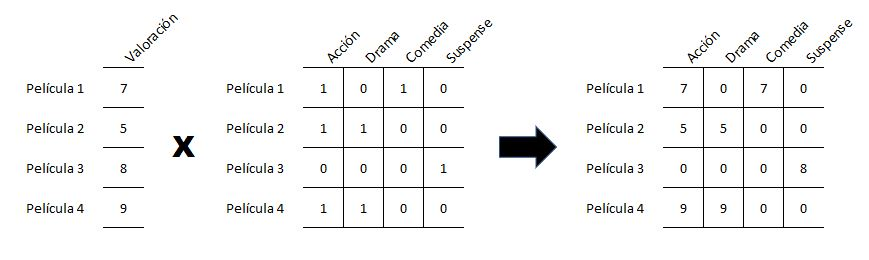

Si ahora sumamos todas las puntuaciones de cada género en la matriz, obtendríamos el perfil del usuario con las puntuaciones totales por genéro:

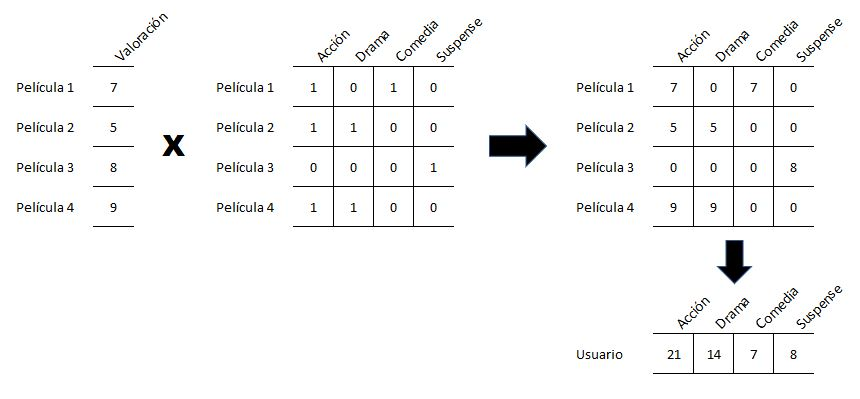

Para concluir con el perfil del usuario, bastaría convertir a porcentaje los anteriores valores, siendo el total la suma de todos los géneros. Así, el genéro con mayor pero sería acción, con un 42%. Cuantas más películas se vean de un género determinado y mayor sea la puntuación del usuario, mayor peso tendrá en el perfil del usuario.

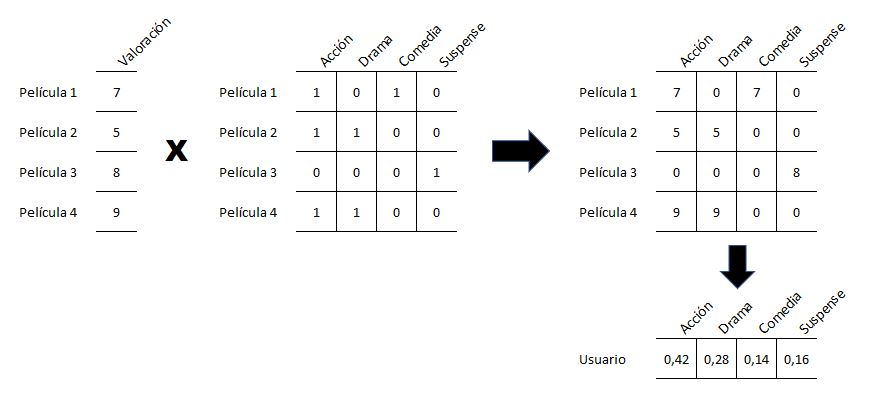

Ya con el perfil del usuario, simplemente debemos llevar a cabo el proceso inverso. Teniendo una nueva matriz de películas, en este no visualizadas, esta será multiplicada por las valoraciones del perfil de usuario para cada uno de los géneros, obteniendo así una nueva matriz de valoraciones. Basta con sumar las puntuaciones de cada película para obtener la valoración total para el usuario con el que estamos trabajando, donde mayor será la recomendación cuanto mayor sea el valor.

Así, en el ejemplo que venimos mostrando, el orden de recomendaciones serían las películas 6, 9, 7 y 8. Resulta sencillo comprender que, cuanto más visualicemos y mejor puntuemos un género, más repercusión va a tener en las valoraciones posteriores.

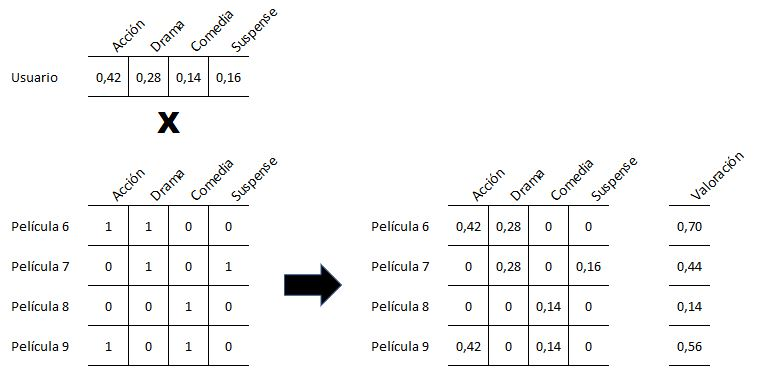

# 2. Implementación

## 2.1. Creación de la clase

Con el objetivo de que el seguimiento del código resulte más comprensible y más liviano a la hora de revisar cada uno de los ejemplos propuestos, se ha creado una clase que realiza las principales tareas sobre el conjunto de datos de IMDb.

In [1]:
import pandas as pd
import numpy as np

In [25]:
class IMDb:
    
    #Lee el fichero de datos y lo almacena de forma global para la clase
    def __init__(self):
        global movies
        
        #Lee y devuelve el archivo con todas las películas de IMDb
        movies = pd.read_csv('IMDb movies.csv', low_memory=False)
        movies = movies[['imdb_title_id','original_title','year','genre','country','avg_vote','votes','metascore']]
        movies = movies[movies['year']!='TV Movie 2019']  #Existe un valor que no es un año. Lo borramos
        movies = movies.astype({'year':int})

        #Creamos una columan por cada género y ponemos un 1 si pertenece a él
        movies['genre'] = movies['genre'].str.split(', ')
        for index, row in movies.iterrows():
            for genre in row['genre']:
                movies.at[index, genre] = 1
        #Para poner todos los NaN como valor cero excepto la columna 'metascore'
        temp_metascore = movies['metascore']
        movies = movies.fillna(0)
        movies['metascore'] = temp_metascore
    
    #Devuelve el histórico de puntuaciones de un usuario
    def get_profile(self, n):
        user = pd.read_csv('user_profile_' + str(n) + '.csv')
        user.rename(columns={'title':'original_title'}, inplace=True)
        
        return user
    
    #Devuelve las 7 películas más populares de 2019 a hoy, 5 entre 2010 y 2019, 3 entre 2005 y 2010, y 5 entre 1990 y 2005
    def get_top20(self, user):
        top2020 = movies[movies['year']>=2019].sort_values('votes', ascending=False).head(7)
        top2010 = movies[(movies['year']>=2010) & (movies['year']<2019)].sort_values('votes', ascending=False).head(5)
        top2000 = movies[(movies['year']>=2005) & (movies['year']<2010)].sort_values('votes', ascending=False).head(3)
        top1990 = movies[(movies['year']>=1990) & (movies['year']<2005)].sort_values('votes', ascending=False).head(5)
        top20 = top2020.append(top2010.append(top2000.append(top1990)))
        top20.sort_values('year', ascending=False, inplace=True)
        top20 = top20[['imdb_title_id','original_title','year','genre','avg_vote']]
        top20 = top20[~top20['original_title'].isin(user['original_title'].tolist())]

        return top20
    
    #En función de los genéros del usuario y las valoraciones, devuelve las 20 películas que más le encajan
    def recommend(self, user):
        user_genres = self.__get_user_genres(user)
        unwatched = movies[~movies['original_title'].isin(user['original_title'].tolist())]
        unwatched_matrix = unwatched.drop(columns=['original_title','year','genre','country','avg_vote','votes','metascore'],
                                          axis=1)
        unwatched_matrix.set_index('imdb_title_id', inplace=True)
        scores = (unwatched_matrix * user_genres).sum(axis=1)
        scores = scores.to_frame()
        scores.reset_index(inplace=True)
        scores.rename({0:'score'}, axis=1, inplace=True)

        top20 = pd.merge(how='inner', left=unwatched, right=scores, left_on='imdb_title_id', right_on='imdb_title_id')
        top20 = top20[['imdb_title_id','original_title','year','genre','avg_vote','votes','score']]
        top20 = top20[(top20['votes']>20000) & (top20['avg_vote']>=7.0)]
        top20.sort_values(['score','avg_vote','year'], ascending=[False,False,False], inplace=True)
        top20.drop(columns=['votes','score'], axis=1, inplace=True)

        return top20.head(20)
    
    #Calcula porcentajes de cada género para cada usuario
    def __get_user_genres(self, user):
        user_genres = pd.merge(how='inner', 
                               left=user[['original_title']], right=movies, 
                               left_on='original_title', right_on='original_title')
        user_genres.drop(columns=['original_title','imdb_title_id','year','genre','country','avg_vote','votes','metascore'],
                         axis=1, inplace=True)
        genres = user_genres.transpose().dot(user['rating'])
        genres = genres / sum(genres)

        return genres

In [28]:
dbmovies = IMDb()

## 2.2. Ejemplos de uso
### 2.2.1. Ejemplo 1: nuevo usuario

El primer usuario con el que trabajaremos será uno cuyo listado de votaciones está vacío, y que por tanto es un usuario nuevo que nunca ha visto una película en la plataforma. Las películas propuestas serán las 20 más populares basándonos en el criterio anteriormente descrito:

In [29]:
user = dbmovies.get_profile(1)

if len(user) >= 20:
    user_recommended = dbmovies.recommend(user)
elif len(user) > 3:
    personal = len(user)
    popular = 20 - personal
    top20_popular = dbmovies.get_top20(user)
    top20_personal = dbmovies.recommend(user)
    user_recommended = top20_personal.head(personal).append(top20_popular.head(popular), ignore_index=True)
    user_recommended.drop_duplicates(subset='imdb_title_id', keep='first', inplace=True)
    user_recommended.sort_values('avg_vote', ascending=False, inplace=True)
else:
    user_recommended = dbmovies.get_top20(user)

user_recommended    

,imdb_title_id,original_title,year,genre,avg_vote
82239,tt7286456,Joker,2019,"[Crime, Drama, Thriller]",8.5
81897,tt7131622,Once Upon a Time... in Hollywood,2019,"[Comedy, Drama]",7.6
81146,tt6751668,Gisaengchung,2019,"[Comedy, Drama, Thriller]",8.6
73863,tt4154664,Captain Marvel,2019,"[Action, Adventure, Sci-Fi]",6.9
84912,tt8946378,Knives Out,2019,"[Comedy, Crime, Drama]",7.9
84442,tt8579674,1917,2019,"[Drama, War]",8.3
73865,tt4154796,Avengers: Endgame,2019,"[Action, Adventure, Drama]",8.4
50294,tt0816692,Interstellar,2014,"[Adventure, Drama, Sci-Fi]",8.6
50773,tt0848228,The Avengers,2012,"[Action, Adventure, Sci-Fi]",8.0
62660,tt1853728,Django Unchained,2012,"[Drama, Western]",8.4


### 2.2.2. Ejemplo 2: usuario poco frecuente

El segundo usuario de ejemplo ya ha visto y valorado algunas películas en la plataforma, concretamente las siguientes:

In [33]:
user = dbmovies.get_profile(2)
user

,original_title,rating
0,Forrest Gump,9.0
1,The Hangover,7.0
2,Harry Potter and the Sorcerer's Stone,7.5
3,The Lord of the Rings: The Fellowship of the Ring,9.0


Como todavía no ha alcanzado el valor de 20 películas vistas y valoradas, el sistema devolverá como sugerencias una combinación de las películas más populares y las que mejor se adaptan a sus gustos iniciales.

Prueba de ello es, que habiendo valorado positivamente la primera parte de la trilogía de El Señor de los Anillos, las siguientes partes de la saga ya se encuentran en las primeras posiciones de las valoraciones:

In [30]:
if len(user) >= 20:
    user_recommended = dbmovies.recommend(user)
elif len(user) > 3:
    personal = len(user)
    popular = 20 - personal
    top20_popular = dbmovies.get_top20(user)
    top20_personal = dbmovies.recommend(user)
    user_recommended = top20_personal.head(personal).append(top20_popular.head(popular), ignore_index=True)
    user_recommended.drop_duplicates(subset='imdb_title_id', keep='first', inplace=True)
    user_recommended.sort_values('avg_vote', ascending=False, inplace=True)
else:
    user_recommended = dbmovies.get_top20(user)

user_recommended    

,imdb_title_id,original_title,year,genre,avg_vote
17,tt0468569,The Dark Knight,2008,"[Action, Crime, Drama]",9.0
0,tt0167260,The Lord of the Rings: The Return of the King,2003,"[Action, Adventure, Drama]",8.9
15,tt1375666,Inception,2010,"[Action, Adventure, Sci-Fi]",8.8
19,tt0137523,Fight Club,1999,[Drama],8.8
1,tt0167261,The Lord of the Rings: The Two Towers,2002,"[Action, Adventure, Drama]",8.7
6,tt6751668,Gisaengchung,2019,"[Comedy, Drama, Thriller]",8.6
11,tt0816692,Interstellar,2014,"[Adventure, Drama, Sci-Fi]",8.6
2,tt0047478,Shichinin no samurai,1954,"[Action, Adventure, Drama]",8.6
4,tt7286456,Joker,2019,"[Crime, Drama, Thriller]",8.5
3,tt0172495,Gladiator,2000,"[Action, Adventure, Drama]",8.5


### 2.2.3. Usuario 3: usuario habitual

Por último, vamos a trabajar con un tercer usuario de ejemplo que ya ha alcanzado el umbral de las 20 películas:

In [35]:
user = dbmovies.get_profile(3)
user

,original_title,rating
0,The Dark Knight,9.0
1,I Origins,7.0
2,Blade Runner,10.0
3,The Shining,9.5
4,Interstellar,10.0
5,Django Unchained,9.0
6,Inception,9.0
7,Fight Club,8.0
8,Forrest Gump,8.0
9,The Shawshank Redemption,9.0


Pese a que hay películas de diversos géneros, las mejor valoradas se corresponden a los géneros de acción, aventuras y drama. Con todo ello, el sistema devuelve ya un listado completamente personalizado.

Si como yo desconoces la primera coincidencia del listado (entre otras), se trata de "Los siete samuráis" de Akira Kurosawa, de la cual buscando información he averiguado que es una frecuente en los listados de las mejores películas de la historia.

In [31]:
if len(user) >= 20:
    user_recommended = dbmovies.recommend(user)
elif len(user) > 3:
    personal = len(user)
    popular = 20 - personal
    top20_popular = dbmovies.get_top20(user)
    top20_personal = dbmovies.recommend(user)
    user_recommended = top20_personal.head(personal).append(top20_popular.head(popular), ignore_index=True)
    user_recommended.drop_duplicates(subset='imdb_title_id', keep='first', inplace=True)
    user_recommended.sort_values('avg_vote', ascending=False, inplace=True)
else:
    user_recommended = dbmovies.get_top20(user)

user_recommended    

,imdb_title_id,original_title,year,genre,avg_vote
8132,tt0047478,Shichinin no samurai,1954,"[Action, Adventure, Drama]",8.6
34432,tt0172495,Gladiator,2000,"[Action, Adventure, Drama]",8.5
73844,tt4154796,Avengers: Endgame,2019,"[Action, Adventure, Drama]",8.4
60537,tt1663202,The Revenant,2015,"[Action, Adventure, Drama]",8.0
49346,tt0498380,Letters from Iwo Jima,2006,"[Action, Adventure, Drama]",7.9
48237,tt0472043,Apocalypto,2006,"[Action, Adventure, Drama]",7.8
37997,tt0245844,The Count of Monte Cristo,2002,"[Action, Adventure, Drama]",7.8
5954,tt0040724,Red River,1948,"[Action, Adventure, Drama]",7.8
26694,tt0104691,The Last of the Mohicans,1992,"[Action, Adventure, Drama]",7.7
64562,tt2103281,Dawn of the Planet of the Apes,2014,"[Action, Adventure, Drama]",7.6


# 3. Conclusiones

En este cuaderno hemos descrito un sencillo método para realizar recomendaciones basadas en contenido y como puede ser fácilmente implementado con Python. El proceso es extrapolable a muchos otros ámbitos; basta cambiar lo que en este ejemplo son películas por los productos o servicios que consideremos, y los géneros cinematográficos por las características diferenciadoras de los mismos.

En lo que atañe a este ejemplo, debemos resaltar:

__Fortalezas__
<ul>
    <li>Sencillez a la hora de ser implementado, tanto en código y operaciones requeridas, como en elementos necesarios (base de datos general y un perfil de usuario).</li>
    <li>Resultados inmediatos que se adaptan al usuario desde las primeras interacciones. La fase de aprendizaje es muy corta.</li>
</ul>

__Debilidades__
<ul>
    <li>Requiere de la interacción del usuario (a modo de valoraciones). Aumentando un poco la complejidad, se podrían adoptar soluciones alternativas, como equiparar una película vista hasta el final con una puntuación alta, y una interrumpida con puntuación baja/mediocre, o en otros ámbitos, trabajar con las páginas vistas o productos comprados.</li>
</ul>

__Oportunidades de mejora__
<ul>
    <li>Requiere ser combinado con un sistema colaborativo para ser completamente operativo (como se ha explicado, para este ejemplo requeriría de todos los perfiles de los usuarios que han votado, algo a lo que no tenemos acceso). Muestra de ello es el resultado de las recomendaciones del usuario 3, donde todas las recomendaciones pertenecen a los mismos géneros. Si bien han sido los géneros que más ha visto y mejor ha valorado, una combinación con el sistema colaborativo podría haber aportados otras películas de otros géneros que hayan agradado a perfiles de usuarios similares al suyo.</li>
    <li>Debido al conjunto de datos que hemos obtenido, y no al sistema de recomendación, el número de categorías de las películas resulta escaso y genérico, afectando a la calidad de las recomendaciones. Como se puede comprobar sobre estas líenas, "Los Vengadores" y "El Conde de Montecristo" comparten las mismas categorías, siendo productos muy diferentes.</li>
</ul>